In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [21]:
card_data <- read_delim("cardio_train.csv", delim = ";")
card_data <- card_data %>%
    mutate(cholesterol = as_factor(cholesterol),
           gluc = as_factor(gluc),
        smoke = as_factor(smoke),
        alco = as_factor(alco),
          active = as_factor(active),
          cardio = as_factor(cardio),
          age = age / 365,
          bmi = weight / (height/100)^2)
card_data

card_sample <- card_data %>%
    sample_n(250)

Parsed with column specification:
cols(
  id = col_double(),
  age = col_double(),
  gender = col_double(),
  height = col_double(),
  weight = col_double(),
  ap_hi = col_double(),
  ap_lo = col_double(),
  cholesterol = col_double(),
  gluc = col_double(),
  smoke = col_double(),
  alco = col_double(),
  active = col_double(),
  cardio = col_double()
)



id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
0,50.39178,2,168,62,110,80,1,1,0,0,1,0,21.96712
1,55.41918,1,156,85,140,90,3,1,0,0,1,1,34.92768
2,51.66301,1,165,64,130,70,3,1,0,0,0,1,23.50781
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
99996,52.23562,2,183,105,180,90,3,1,0,1,0,1,31.35358
99998,61.45479,1,163,72,135,80,1,2,0,0,0,1,27.09925
99999,56.27397,1,170,72,120,80,2,1,0,0,1,0,24.91349


Warning message:
“Removed 4 rows containing missing values (geom_point).”


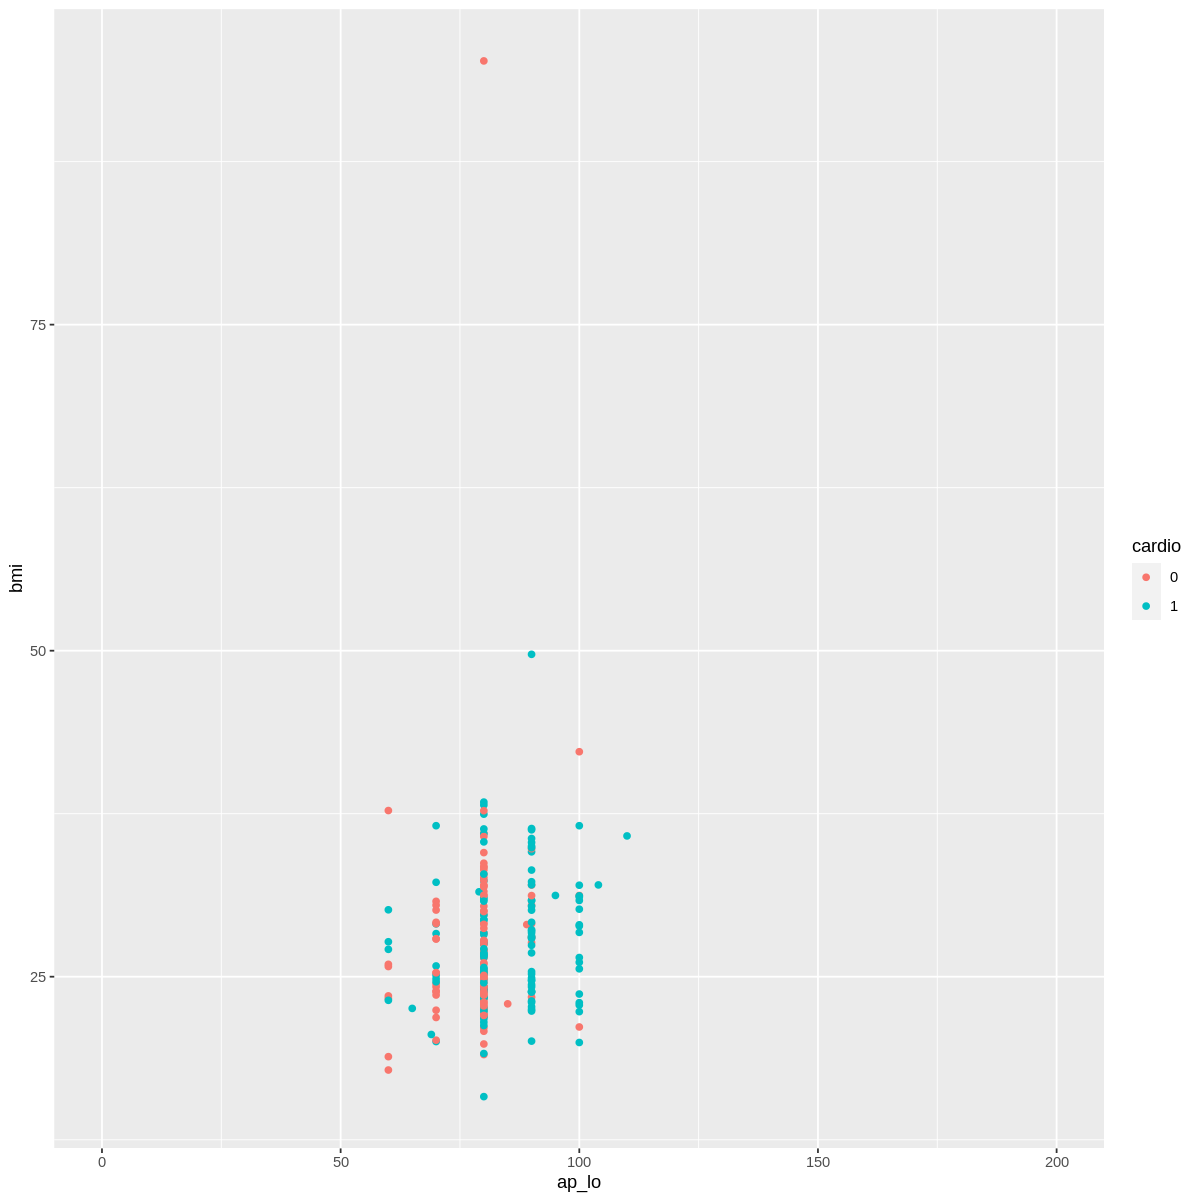

In [31]:
options(repr.plot.height = 10, repr.plot.width = 10)
plot <- ggplot(card_sample, aes(x = ap_lo, y = bmi, color = cardio)) + 
    geom_point() +
    scale_x_continuous(limits = c(0,200))
plot